In [703]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2021-03-25 12:12:55--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: `auto-mpg.data.12'

     0K .......... .......... .........                       100% 3.39M=0.009s

2021-03-25 12:12:56 (3.39 MB/s) - `auto-mpg.data.12' saved [30286/30286]



In [704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [705]:
df = pd.read_csv('./auto-mpg.data', comment='\t', na_values='?', sep=" ", skipinitialspace=True)
df

,18.0,8,307.0,130.0,3504.,12.0,70,1
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [706]:
# mpg - miles per gallon (continuous)
# cylinder - power unit of the engine, could be 4, 6, 8 in a car.(This is where fuel is burnt)
            # It contains a piston that moves up and down, compressing the fuel, which ignites
            # and causes combustion (multi-valued discrete)
# displacement - It is the measure of the cylinder volume swept by all of the
                # pistons of a piston engine, excluding the combustion chambers.(continuous)
# horsepower - Power an engine produces (continuous)
# weight - curb weight (without the driver, passenger or any cargo)-continuous
# acceleration - any process where the velocity changes(continuous)
# model year- make year - multivalued discrete
# origin - multivalued discrete
# car name - string(unique for each instance)
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
        'Acceleration', 'Model Year', 'Origin' ]
df.columns = cols
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [707]:
data = df.copy()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


# Exploratary data analysis

In [708]:
data.info() # Horsepower column has 6 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           397 non-null    float64
 1   Cylinders     397 non-null    int64  
 2   Displacement  397 non-null    float64
 3   Horsepower    391 non-null    float64
 4   Weight        397 non-null    float64
 5   Acceleration  397 non-null    float64
 6   Model Year    397 non-null    int64  
 7   Origin        397 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


In [709]:
data.isnull().sum() # summing all num values in each column

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [710]:
data['Horsepower'].value_counts() # Checking for most repeated values

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
220.0     1
200.0     1
103.0     1
230.0     1
54.0      1
Name: Horsepower, Length: 93, dtype: int64

In [711]:
data['Horsepower'].idxmax()

115

In [712]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

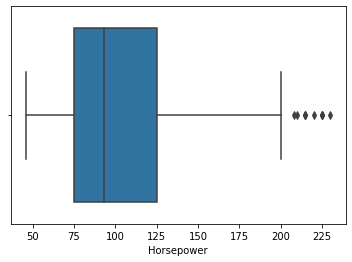

In [713]:
sns.boxplot(x=data['Horsepower']) # checking for average values and outlier

In [714]:
# We have outliers so we are gonna fill null values in horsepower with median horsepower
median_horsepower = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median_horsepower)

In [715]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           397 non-null    float64
 1   Cylinders     397 non-null    int64  
 2   Displacement  397 non-null    float64
 3   Horsepower    397 non-null    float64
 4   Weight        397 non-null    float64
 5   Acceleration  397 non-null    float64
 6   Model Year    397 non-null    int64  
 7   Origin        397 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


In [716]:
# Let's look at categorical attribute cylinders and origin
data['Cylinders'].value_counts()

4    204
8    102
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [717]:
data['Cylinders'].value_counts() / len(data)

4    0.513854
8    0.256927
6    0.211587
3    0.010076
5    0.007557
Name: Cylinders, dtype: float64

In [718]:
data['Origin'].value_counts()

1    248
3     79
2     70
Name: Origin, dtype: int64

In [719]:
corr_matrix = data.corr()
corr_matrix
# MPG negatively correlates with displacement, weight , horsepower.

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.775412,-0.803972,-0.773252,-0.831558,0.419133,0.578667,0.562894
Cylinders,-0.775412,1.000000,0.950718,0.841688,0.896623,-0.503016,-0.344729,-0.561796
Displacement,-0.803972,0.950718,1.000000,0.895853,0.932957,-0.542083,-0.367470,-0.608749
Horsepower,-0.773252,0.841688,0.895853,1.000000,0.862357,-0.686322,-0.412669,-0.451347
Weight,-0.831558,0.896623,0.932957,0.862357,1.000000,-0.416488,-0.305150,-0.580552
Acceleration,0.419133,-0.503016,-0.542083,-0.686322,-0.416488,1.000000,0.284376,0.204102
Model Year,0.578667,-0.344729,-0.367470,-0.412669,-0.305150,0.284376,1.000000,0.178441
Origin,0.562894,-0.561796,-0.608749,-0.451347,-0.580552,0.204102,0.178441,1.000000


array([[<AxesSubplot:xlabel='MPG', ylabel='MPG'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='MPG'>,
        <AxesSubplot:xlabel='Displacement', ylabel='MPG'>,
        <AxesSubplot:xlabel='Weight', ylabel='MPG'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Weight', ylabel='Horsepower'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Weight', ylabel='Displacement'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Weight'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Weight'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>]], dtype=object)

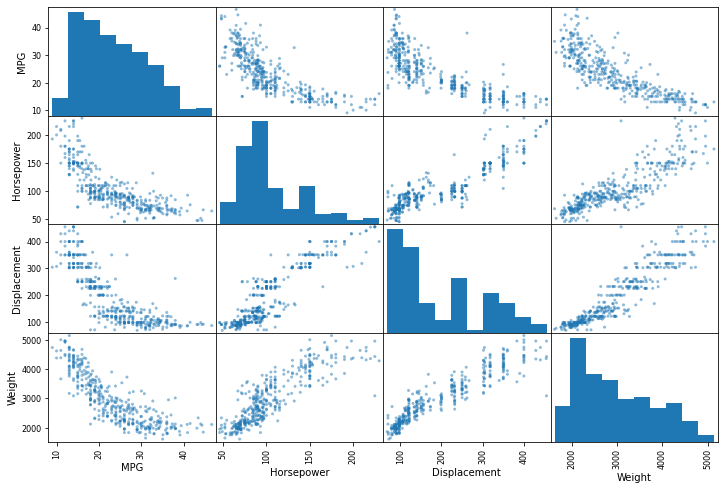

In [720]:
from pandas.plotting import scatter_matrix
attributes = ['MPG','Horsepower', 'Displacement', 'Weight']
scatter_matrix(data[attributes], figsize=(12, 8))
# MPG increases, all 3 attributes, weight, horsepower and displacement decreases

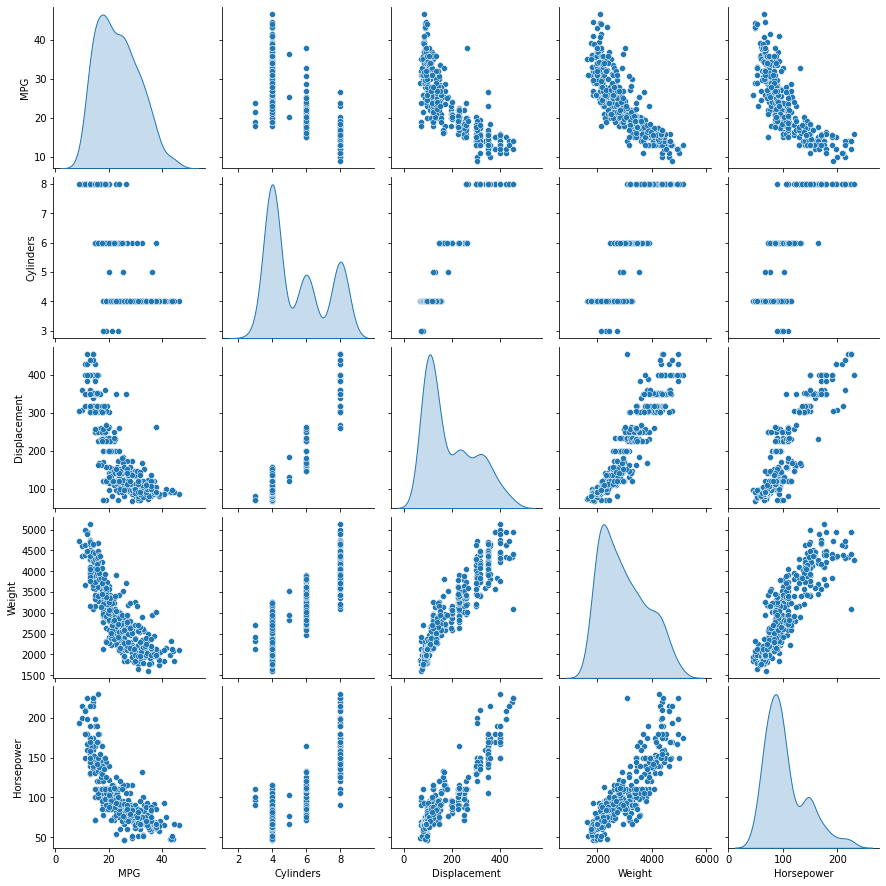

In [721]:
# Using seaborn for plotting
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde')

In [722]:
#  using train_test_split to split the data
from sklearn.model_selection import train_test_split
train_set = data.drop('MPG', axis=1)
test_set = data['MPG'].copy()
X_train, X_test, y_train, y_test = train_test_split(train_set, test_set, test_size=0.2, random_state=42)

In [723]:
X_train['Cylinders'].value_counts()/len(X_train) # Observing data spreading

4    0.511041
8    0.249211
6    0.220820
3    0.009464
5    0.009464
Name: Cylinders, dtype: float64

In [724]:
X_test['Cylinders'].value_counts()/len(X_test) 
# see the difference in result using startified sampling and normal train_test_split

4    0.5250
8    0.2875
6    0.1750
3    0.0125
Name: Cylinders, dtype: float64

In [725]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [726]:
strat_train_set.shape, strat_test_set.shape

((317, 8), (80, 8))

In [727]:
input_data = strat_train_set.drop('MPG', axis=1)
input_label = strat_train_set['MPG'].copy()
X_test_strat = strat_test_set.drop('MPG', axis=1)
y_test_strat = strat_test_set['MPG'].copy()


In [728]:
def preprocess_origin(some_df):
    some_df['Origin'] = some_df['Origin'].map({1: 'India', 2: 'USA', 3: 'Germany'})
    return some_df

new_data = preprocess_origin(input_data)
new_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
144,4,83.0,61.0,2003.0,19.0,74,Germany
150,4,79.0,67.0,2000.0,16.0,74,USA
387,4,156.0,92.0,2585.0,14.5,82,India
225,6,231.0,105.0,3425.0,16.9,77,India
113,4,98.0,90.0,2265.0,15.5,73,USA


In [729]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 144 to 224
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     317 non-null    int64  
 1   Displacement  317 non-null    float64
 2   Horsepower    317 non-null    float64
 3   Weight        317 non-null    float64
 4   Acceleration  317 non-null    float64
 5   Model Year    317 non-null    int64  
 6   Origin        317 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.8+ KB


In [730]:
new_data[['Origin']]

,Origin
144,Germany
150,USA
387,India
225,India
113,USA
...,...
146,USA
249,India
394,India
13,Germany


In [731]:
from sklearn.preprocessing import OneHotEncoder
data_cat = new_data[['Origin']]
cat_encod = OneHotEncoder()
cat_encod_hot = cat_encod.fit_transform(data_cat)
cat_encod_hot.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [732]:
cat_encod.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

In [733]:
data_num = new_data.iloc[:, :-1]
data_num

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
144,4,83.0,61.0,2003.0,19.0,74
150,4,79.0,67.0,2000.0,16.0,74
387,4,156.0,92.0,2585.0,14.5,82
225,6,231.0,105.0,3425.0,16.9,77
113,4,98.0,90.0,2265.0,15.5,73
...,...,...,...,...,...,...
146,4,90.0,75.0,2108.0,15.5,74
249,8,318.0,140.0,3735.0,13.2,78
394,4,135.0,84.0,2295.0,11.6,82
13,4,113.0,95.0,2372.0,15.0,70


In [734]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [735]:
X = imputer.transform(data_num)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  250. ,  110. , 3520. ,   16.4,   77. ]])

In [736]:
data_transform = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)
data_transform.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
144,4.0,83.0,61.0,2003.0,19.0,74.0
150,4.0,79.0,67.0,2000.0,16.0,74.0
387,4.0,156.0,92.0,2585.0,14.5,82.0
225,6.0,231.0,105.0,3425.0,16.9,77.0
113,4.0,98.0,90.0,2265.0,15.5,73.0


In [737]:
from sklearn.base import BaseEstimator, TransformerMixin
acc, hp, cyl = 4, 2, 0
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        acc_on_cyl = X[:, acc] / X[:, cyl]
        if self.acc_on_power:
            acc_on_power = X[:, acc] / X[:, hp]
            return np.c_[X, acc_on_power, acc_on_cyl]
        return np.c_[X, acc_on_cyl]

# attr_adder = CustomAttrAdder(acc_on_power=True)
# data_new_attr = attr_adder.transform(data_transform.values)

# data_new_attr[0]

In [738]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def pipeline_transformer(data):
    num_data = data.select_dtypes(['float64', 'int64'])
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('attrs_adder', CustomAttrAdder()),
        ('scaler', StandardScaler()),
    ])
    #num_data_tr = pipe.fit_transform(num_data)
    return num_data, pipe


In [739]:
from sklearn.compose import ColumnTransformer

def fullpipeline_transformer(data):
    # num_attrs = list(data_num)
    cat_attrs = ['Origin']
    num_data, pipe = pipeline_transformer(data)

    full_pipeline = ColumnTransformer([
        ('num', pipe, list(num_data)),
        ('cat', OneHotEncoder(), cat_attrs),
    ])
    prep_data = full_pipeline.fit_transform(data)
    return prep_data

In [740]:
processed_df = preprocess_origin(input_data)
prepared_data = fullpipeline_transformer(processed_df)
prepared_data[:1]

array([[-0.8561677 , -1.07513438, -1.16217886, -1.17462585,  1.22794033,
        -0.54251875,  1.71126998,  1.29466205,  1.        ]])

In [741]:
# Selecting and training model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, input_label)


LinearRegression()

In [742]:
sample = input_data.iloc[:5]
sample_label = input_label.iloc[:5]
sample_data_prepared = fullpipeline_transformer(sample)

In [743]:
prediction_sample = lin_reg.predict(sample_data_prepared)

In [744]:
from sklearn.metrics import mean_squared_error
predicting_train_data = lin_reg.predict(prepared_data)
mse = mean_squared_error(input_label, predicting_train_data)
rmse = np.sqrt(mse)
rmse

3.01079688501709

In [745]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(prepared_data, input_label)

RandomForestRegressor()

In [746]:
from sklearn.model_selection import cross_val_score
forest_cv_score = cross_val_score(forest, prepared_data, input_label, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score = np.sqrt(-forest_cv_score)
forest_rmse_score.mean()

2.627276531400431

In [747]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(prepared_data, input_label)
svr_scores = cross_val_score(svr, prepared_data, input_label, scoring='neg_mean_squared_error', cv=10)
svr_rmse_score = np.sqrt(-svr_scores)
svr_rmse_score.mean()


3.1409620342706166

In [748]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, scoring='neg_mean_squared_error',
                          return_train_score=True,
                          cv=10)
grid_search.fit(prepared_data, input_label)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [749]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [750]:
grid_cv_scores = grid_search.cv_results_
for mean, param in zip(grid_cv_scores['mean_test_score'], grid_cv_scores['params']):
    print(np.sqrt(-mean), param)

3.4804169892923515 {'max_features': 2, 'n_estimators': 3}
2.898133471903553 {'max_features': 2, 'n_estimators': 10}
2.8406323924415937 {'max_features': 2, 'n_estimators': 30}
3.339734680026979 {'max_features': 4, 'n_estimators': 3}
2.7984295801251378 {'max_features': 4, 'n_estimators': 10}
2.690230010211116 {'max_features': 4, 'n_estimators': 30}
3.064610694636012 {'max_features': 6, 'n_estimators': 3}
2.835811857498489 {'max_features': 6, 'n_estimators': 10}
2.746549871223257 {'max_features': 6, 'n_estimators': 30}
3.0065148235803862 {'max_features': 8, 'n_estimators': 3}
2.8314328699042455 {'max_features': 8, 'n_estimators': 10}
2.712085632258412 {'max_features': 8, 'n_estimators': 30}
3.0501402444400303 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.8759023531333714 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.0428605883339186 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.796409137179322 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [751]:
feature_importances= grid_search.best_estimator_.feature_importances_

In [752]:
extra_attr = ['acc_on_power', 'acc_on_cyl']
numerics = ['float64', 'int64']
num_attr = list(input_data.select_dtypes(include=numerics))
attrs = num_attr + extra_attr
sorted(zip(attrs, feature_importances))

[('Acceleration', 0.019070715948431342),
 ('Cylinders', 0.18025791916659847),
 ('Displacement', 0.24843887831036537),
 ('Horsepower', 0.1492677408798406),
 ('Model Year', 0.11582319076951565),
 ('Weight', 0.17587110577730292),
 ('acc_on_cyl', 0.07958826166452551),
 ('acc_on_power', 0.031682187483420075)]

In [753]:
final_model = grid_search.best_estimator_



In [755]:
X_test_processed = preprocess_origin(X_test)
X_test_prepared = fullpipeline_transformer(X_test_processed)

final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

<ipython-input-728-e7ce869256a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_df['Origin'] = some_df['Origin'].map({1: 'India', 2: 'USA', 3: 'Germany'})


2.0549057831875843

In [756]:
def mpg_prediction(config, model):
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    preprocess_data = preprocess_origin(df)
    prepared_data = fullpipeline_transformer(preprocess_data)
    prediction = model.predict(prepared_data)
    return prediction

In [757]:
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}
mpg_prediction(vehicle_config, final_model)

ValueError: X has 11 features, but DecisionTreeRegressor is expecting 9 features as input.